In [1]:
#
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from specgen import spectrum_PM, spectrum_gen_linear, eta_random, spectrum_PM_piece
#
P    = 0.0016/6.4;          # energy level (estimated so that kpHs is reasonable)
Bo_1 = 200;
Bo_2 = 1
N  = 4
L  = 2.0*np.pi    # domain size
kp = 2*np.pi/(L/N)    # peak wavenumber
N_mode  = 64 # number of modes
N_power = 5   # directional spreading coeff
k_cf = (kp**2*Bo_1/Bo_2)**0.5
print(k_cf);
#

56.568542494923804


In [2]:
#
def shape(kmod):
    ''' Choose values here '''
    global P, kp
    #F_kmod = spectrum_PM (P, kp, kmod);
    F_kmod = spectrum_PM_piece (P, kp, k_cf, kmod);
    #F_kmod = spectrum_PM(P, kp, kmod)
    return F_kmod
#
kmod, F_kmod, kx, ky, F_kxky_tile = spectrum_gen_linear(
    shape, N_mode=N_mode, L=L, N_power=N_power)
#
''' Generate a grid in x-y to visualize random eta '''
N_grid = 256  # L = 200
x = np.linspace(-L/2, L/2, N_grid)
y = np.linspace(-L/2, L/2, N_grid)
x_tile, y_tile = np.meshgrid(x, y)
kx_tile, ky_tile = np.meshgrid(kx, ky)
t = 0
eta_tile, phase_tile = eta_random(
    t, kx_tile, ky_tile, F_kxky_tile, x_tile, y_tile)
kpHs = kp*np.std(eta_tile)*4;
print('kpHs = %g' % (kpHs));
#

kpHs = 0.0405659


[  1.           3.23809524   5.47619048   7.71428571   9.95238095
  12.19047619  14.42857143  16.66666667  18.9047619   21.14285714
  23.38095238  25.61904762  27.85714286  30.0952381   32.33333333
  34.57142857  36.80952381  39.04761905  41.28571429  43.52380952
  45.76190476  48.          50.23809524  52.47619048  54.71428571
  56.95238095  59.19047619  61.42857143  63.66666667  65.9047619
  68.14285714  70.38095238  72.61904762  74.85714286  77.0952381
  79.33333333  81.57142857  83.80952381  86.04761905  88.28571429
  90.52380952  92.76190476  95.          97.23809524  99.47619048
 101.71428571 103.95238095 106.19047619 108.42857143 110.66666667
 112.9047619  115.14285714 117.38095238 119.61904762 121.85714286
 124.0952381  126.33333333 128.57142857 130.80952381 133.04761905
 135.28571429 137.52380952 139.76190476 142.        ]
[5.15288406e-13 1.09315244e-06 7.81385332e-07 3.89131638e-07
 2.07236841e-07 1.20622841e-07 7.56045208e-08 5.02486684e-08
 3.49882887e-08 2.52940486e-08 1.8

Text(120, 5e-10, '$k_cL_0\\approx 352$')

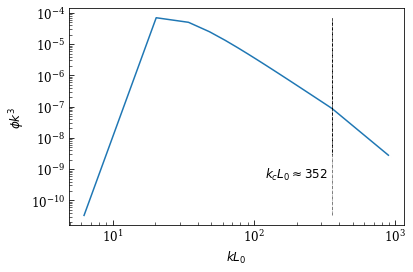

In [3]:
#
do_show = 0;
cm = 1.0/2.54;
wid = 10.0;
hei = 8.5;
st_diss = 50;
size_bib = 8;
size_tit = 14;
line_width = 0.9;
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = "serif"
tdir = 'in'
major = 5.0
minor = 3.0
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor
#
L0 = 2.0*np.pi; kp = 4;
print(kmod)
print(F_kmod)
#plt.xscale('log',base=10)
#plt.yscale('log',base=10) 
plt.loglog(kmod*L0,F_kmod*kp**3);
plt.xlabel(r"$kL_0$");
plt.ylabel(r"$\phi k^3$")
xc = k_cf*np.ones([len(F_kmod)]);
plt.plot(xc*L0,F_kmod*kp**3,'k-.',linewidth=0.5);
plt.annotate(r"$k_cL_0\approx 352$", xy=(120, 0.5e-9))
#
#stop

In [4]:
#
''' When happy, output the spectra '''
print('Spectrum array shape:', F_kxky_tile.shape)
path = "/scratch/cimes/ns8802/precursor_single_phase/broadband/re720_kpHS0p04_L09_R2_bo0200/";
#

#
#''' This is a 0.5 meter box case '''
#kp = 2*np.pi/0.1
#P = 0.0012
#L = 0.5
#N_mode = 32
#N_power = 5

#''' This is a 500 meter box case '''
#kp = 2*np.pi/100
#P = 0.08
#L = 0.5
#N_mode = 32
#N_power = 5
#/home/nn8802/Documents/simulation/embedded
#
file = "F_kxky_P%.5f_L%gm_N%g_kpHs%g_N_mode%g_bo%g" % (P, L, N_power, kpHs, N_mode, Bo_1)
fF = open(path + file, 'bw')
print('Written to', path+file)
F_output = F_kxky_tile.astype('float32')
#F_output = F_kxky_tile.astype('double');
F_output.tofile(fF)
#
file = "kx_P%.5f_L%gm_N%g_kpHs%g_N_mode%g_bo%g" % (P, L, N_power, kpHs, N_mode, Bo_1)
fF = open(path + file, 'bw')
print('Written to', path+file)
F_output = kx.astype('float32')
#F_output = kx.astype('double');
F_output.tofile(fF)
#
file = "ky_P%.5f_L%gm_N%g_kpHs%g_N_mode%g_bo%g" % (P, L, N_power, kpHs, N_mode, Bo_1)
fF = open(path + file, 'bw')
print('Written to', path+file)
F_output = ky.astype('float32');
#F_output = ky.astype('double');
F_output.tofile(fF)

Spectrum array shape: (65, 64)
Written to /scratch/cimes/ns8802/precursor_single_phase/broadband/re720_kpHS0p04_L09_R2_bo0200/F_kxky_P0.00025_L6.28319m_N5_kpHs0.0405659_N_mode64_bo200
Written to /scratch/cimes/ns8802/precursor_single_phase/broadband/re720_kpHS0p04_L09_R2_bo0200/kx_P0.00025_L6.28319m_N5_kpHs0.0405659_N_mode64_bo200
Written to /scratch/cimes/ns8802/precursor_single_phase/broadband/re720_kpHS0p04_L09_R2_bo0200/ky_P0.00025_L6.28319m_N5_kpHs0.0405659_N_mode64_bo200
